<a href="https://colab.research.google.com/github/josejulianhidayat/AnalisaKepuasanKonsumen/blob/main/AnalisaKepuasanKonsumen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV


In [ ]:
# Muat dataset
file_path = 'Extended_Dataset.csv'  # Ganti dengan nama file Anda
data = pd.read_csv(file_path)
data.head()  # Tampilkan 5 baris pertama untuk melihat struktur dataset


,Timestamp,Nama,Usia,Jenis_Kelamin,Domisili,Pendidikan,Pekerjaan,Penghasilan,1. Seberapa sering Anda berbelanja di platform e-commerce?,2. Dimana anda biasanya berbelanja online?,...,6. Seberapa sering fitur rekomendasi membantu Anda menemukan produk yang ingin Anda beli?,"7. Menurut Anda, apakah fitur rekomendasi produk di platform e-commerce membuat pengalaman berbelanja Anda lebih mudah?",8. Seberapa puas Anda dengan akurasi rekomendasi produk yang diberikan oleh platform?,9. Seberapa besar pengaruh fitur rekomendasi produk terhadap keputusan pembelian Anda?,10. Seberapa sering Anda merasa bahwa rekomendasi produk sesuai dengan preferensi atau kebutuhan pribadi Anda?,11. Seberapa puas Anda dengan keseluruhan pengalaman berbelanja di e-commerce yang menggunakan teknologi AI untuk rekomendasi produk?,12. Seberapa nyaman Anda dengan penggunaan teknologi AI dalam merekomendasikan produk di platform e-commerce?,"13. Menurut Anda, seberapa penting fitur rekomendasi produk berbasis AI bagi pengalaman belanja online Anda?",14. Seberapa besar Anda mempercayai rekomendasi yang diberikan oleh fitur AI di platform e-commerce?,15. Apa yang Anda harapkan dari fitur rekomendasi produk berbasis AI di masa mendatang?
0,12/11/2024 20:01:17,ALDRIN MOCH RIDWAN,22,Laki-Laki,BANDUNG,S1,Staf pengajar,Rp 1.000.000 - Rp. 2.900.000,Setiap Bulan,Shopee,...,Kadang-kadang,Netral,0,Berpengaruh,Kadang-kadang,Netral,Netral,Penting,Netral,Peningkatan akurasi dalam mengenali produk yan...
1,12/11/2024 20:16:53,REFALDI NURYANA,25,Laki-Laki,BEKASI,D3,PEKERJA PABRIK,Rp. 5.000.000 - Rp. 9.900.000,Setiap Bulan,Shopee,...,Sering,Sangat setuju,1,Cukup berpengaruh,Sering,Sangat puas,Sangat nyaman,Sangat penting,Percaya,Rekomendasi yang lebih relevan dengan kebutuha...
2,12/11/2024 20:37:54,JOSE JULIAN HIDAYAT,22,Laki-Laki,BEKASI,S1,PEKERJA PABRIK,Rp. 5.000.000 - Rp. 9.900.000,Setiap Bulan,TikTok Shop,...,Kadang-kadang,Setuju,1,Cukup berpengaruh,Kadang-kadang,Netral,Nyaman,Cukup penting,Percaya,Peningkatan akurasi dalam mengenali produk yan...
3,12/11/2024 20:47:28,INTAN PRATIWI,23,Perempuan,BEKASI,SMA/SMK/MA/Sederajat,PEKERJA PABRIK,Rp. 5.000.000 - Rp. 9.900.000,Setiap Bulan,Shopee,...,Sering,Sangat setuju,1,Cukup berpengaruh,Sering,Puas,Sangat nyaman,Sangat penting,Percaya,Adanya opsi untuk menyesuaikan atau mempersona...
4,12/11/2024 20:49:12,EDO WIDODO,21,Laki-Laki,BEKASI,SMA/SMK/MA/Sederajat,PEKERJA PABRIK,Rp. 5.000.000 - Rp. 9.900.000,Setiap Minggu,TikTok Shop,...,Sering,Setuju,1,Berpengaruh,Sering,Puas,Nyaman,Penting,Percaya,Peningkatan akurasi dalam mengenali produk yan...


In [ ]:
print(data.columns)


Index(['Timestamp', 'Nama', 'Usia', 'Jenis_Kelamin', 'Domisili', 'Pendidikan',
       'Pekerjaan', 'Penghasilan',
       '1. Seberapa sering Anda berbelanja di platform e-commerce? ',
       '2. Dimana anda biasanya berbelanja online?',
       '3. Kategori barang apa yang sering anda pesan melalui e-commerce ?',
       '4. Seberapa sering Anda menggunakan fitur rekomendasi produk saat berbelanja online? ',
       '5. Seberapa relevan rekomendasi produk yang ditampilkan kepada Anda di platform e-commerce? ',
       '6.  Seberapa sering fitur rekomendasi membantu Anda menemukan produk yang ingin Anda beli? ',
       '7.  Menurut Anda, apakah fitur rekomendasi produk di platform e-commerce membuat pengalaman berbelanja Anda lebih mudah? ',
       '8. Seberapa puas Anda dengan akurasi rekomendasi produk yang diberikan oleh platform?  ',
       '9. Seberapa besar pengaruh fitur rekomendasi produk terhadap keputusan pembelian Anda?  ',
       '10.  Seberapa sering Anda merasa bahwa rekomenda

In [ ]:
!pip install imbalanced-learn


In [ ]:
# Periksa semua nama kolom
print("Kolom dalam dataset:", data.columns.tolist())


Kolom dalam dataset: ['Timestamp', 'Nama', 'Usia', 'Jenis_Kelamin', 'Domisili', 'Pendidikan', 'Pekerjaan', 'Penghasilan', '1. Seberapa sering Anda berbelanja di platform e-commerce? ', '2. Dimana anda biasanya berbelanja online?', '3. Kategori barang apa yang sering anda pesan melalui e-commerce ?', '4. Seberapa sering Anda menggunakan fitur rekomendasi produk saat berbelanja online? ', '5. Seberapa relevan rekomendasi produk yang ditampilkan kepada Anda di platform e-commerce? ', '6.  Seberapa sering fitur rekomendasi membantu Anda menemukan produk yang ingin Anda beli? ', '7.  Menurut Anda, apakah fitur rekomendasi produk di platform e-commerce membuat pengalaman berbelanja Anda lebih mudah? ', '8. Seberapa puas Anda dengan akurasi rekomendasi produk yang diberikan oleh platform?  ', '9. Seberapa besar pengaruh fitur rekomendasi produk terhadap keputusan pembelian Anda?  ', '10.  Seberapa sering Anda merasa bahwa rekomendasi produk sesuai dengan preferensi atau kebutuhan pribadi Anda

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:22:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300, 'subsample': 1.0}
Final Test Accuracy: 0.82

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.66      0.70      0.68        30
           2       0.68      0.57      0.62        30
           3       0.91      1.00      0.95        30
           4       0.94      0.97      0.96        33

    accuracy                           0.82       150
   macro avg       0.81      0.82      0.81       150
weighted avg       0.82      0.82      0.82       150



<Figure size 800x800 with 0 Axes>

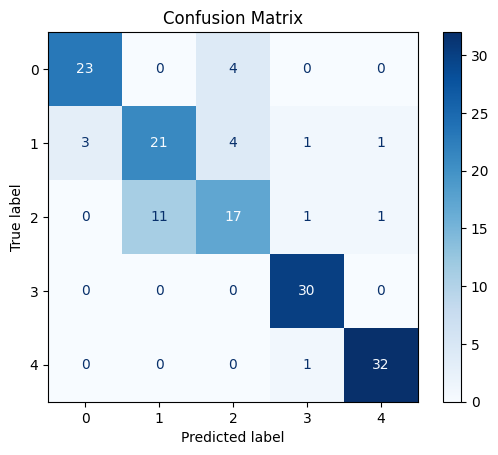

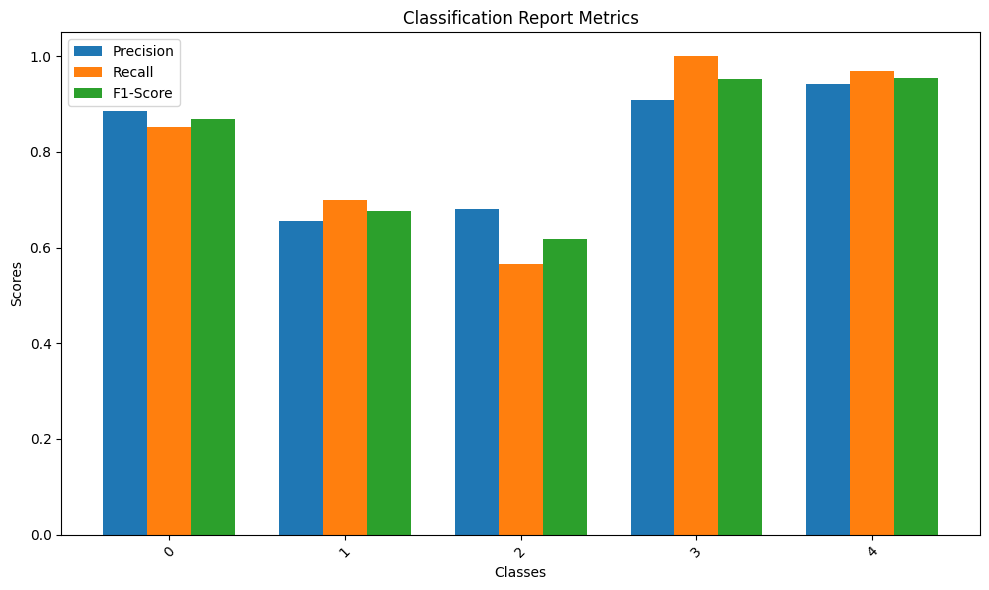

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:22:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:22:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:22:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:22:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:22:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

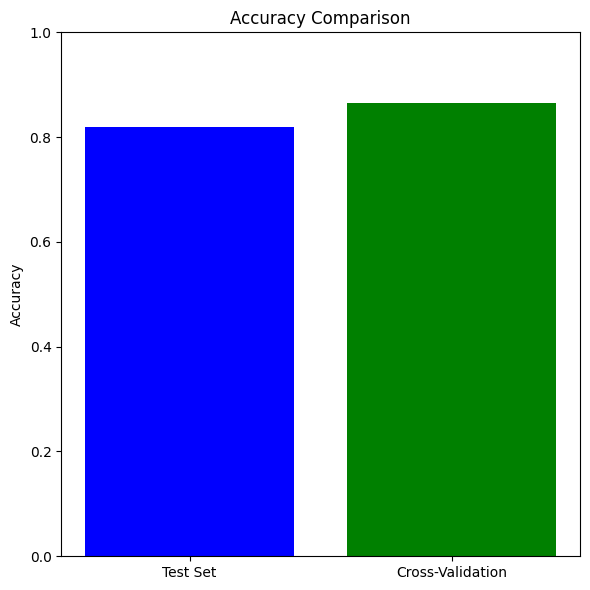

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load dataset
file_path = 'Extended_Dataset.csv'  # Ganti dengan file dataset Anda
data = pd.read_csv(file_path)

# Pilih fitur dan label
features = [
    "Usia",
    "1. Seberapa sering Anda berbelanja di platform e-commerce? ",
    "6.  Seberapa sering fitur rekomendasi membantu Anda menemukan produk yang ingin Anda beli? ",
    "9. Seberapa besar pengaruh fitur rekomendasi produk terhadap keputusan pembelian Anda?  ",
    "10.  Seberapa sering Anda merasa bahwa rekomendasi produk sesuai dengan preferensi atau kebutuhan pribadi Anda? "
]
label = "8. Seberapa puas Anda dengan akurasi rekomendasi produk yang diberikan oleh platform?  "

# Encode data kategorikal
encoder = LabelEncoder()
for col in features + [label]:
    data[col] = encoder.fit_transform(data[col])

# Normalisasi fitur numerik
scaler = StandardScaler()
data["Usia"] = scaler.fit_transform(data[["Usia"]])

# Split data
X = data[features]
y = data[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Oversample data using SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train model using GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0]
}
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="mlogloss")
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Hasil terbaik
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict
y_pred_final = best_model.predict(X_test)

# Evaluate
accuracy_final = accuracy_score(y_test, y_pred_final)
print("Final Test Accuracy:", accuracy_final)
print("\nClassification Report on Test Data:\n", classification_report(y_test, y_pred_final))
# Visualisasi 1: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Visualisasi 2: Classification Report (Bar Chart)
report = classification_report(y_test, y_pred_final, output_dict=True)
categories = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
precision = [report[cat]['precision'] for cat in categories]
recall = [report[cat]['recall'] for cat in categories]
f1_score = [report[cat]['f1-score'] for cat in categories]

x = range(len(categories))

plt.figure(figsize=(10, 6))
plt.bar(x, precision, width=0.25, label='Precision', align='center')
plt.bar([p + 0.25 for p in x], recall, width=0.25, label='Recall', align='center')
plt.bar([p + 0.5 for p in x], f1_score, width=0.25, label='F1-Score', align='center')

plt.xticks([p + 0.25 for p in x], categories, rotation=45)
plt.title("Classification Report Metrics")
plt.xlabel("Classes")
plt.ylabel("Scores")
plt.legend()
plt.tight_layout()
plt.show()

# Visualisasi 3: Accuracy Comparison (Bar Chart)
cv_scores = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()

plt.figure(figsize=(6, 6))
accuracies = [accuracy_final, mean_cv_accuracy]
labels = ["Test Set", "Cross-Validation"]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation dengan model terbaik
cv_scores = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:24:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:24:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:24:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:24:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:24:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-Validation Scores: [0.8630137  0.84931507 0.89041096 0.87671233 0.84931507]
Mean CV Accuracy: 0.8657534246575341


In [ ]:
# Evaluasi model terbaik di test set
y_pred_final = best_model.predict(X_test)
accuracy_final = accuracy_score(y_test, y_pred_final)
print("Final Test Accuracy:", accuracy_final)
print("\nClassification Report on Test Data:\n", classification_report(y_test, y_pred_final))


Final Test Accuracy: 0.82

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.66      0.70      0.68        30
           2       0.68      0.57      0.62        30
           3       0.91      1.00      0.95        30
           4       0.94      0.97      0.96        33

    accuracy                           0.82       150
   macro avg       0.81      0.82      0.81       150
weighted avg       0.82      0.82      0.82       150



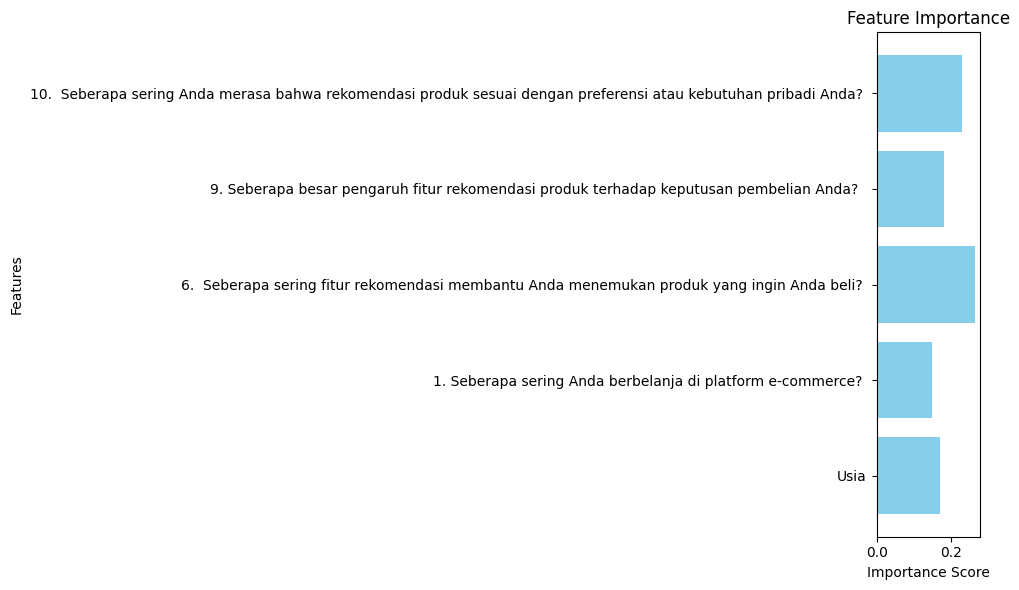

In [ ]:
# Feature Importance Visualization
plt.figure(figsize=(10, 6))
feature_importances = best_model.feature_importances_
plt.barh(features, feature_importances, color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


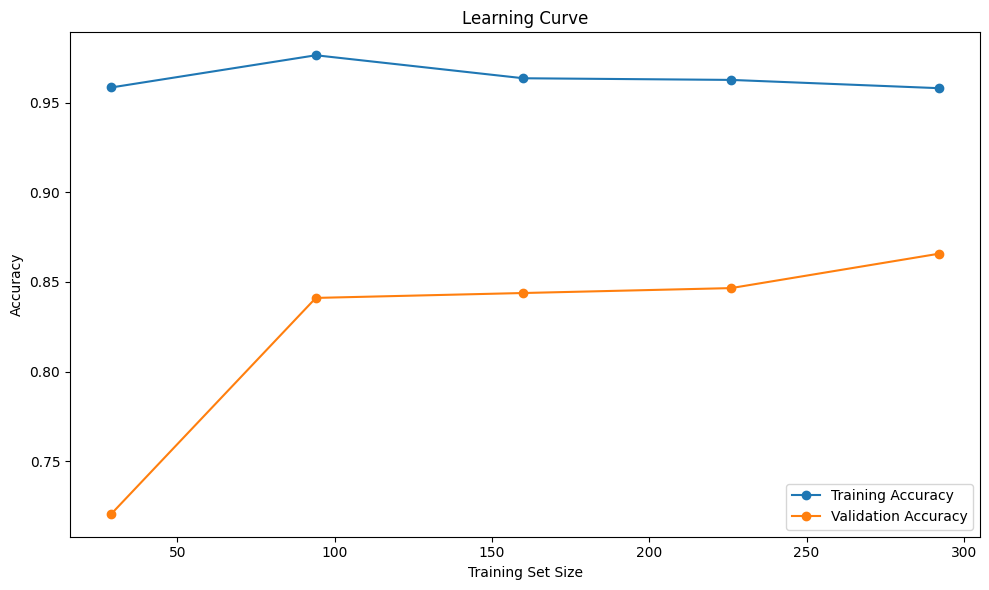

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    best_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy', n_jobs=-1
)
train_mean = train_scores.mean(axis=1)
valid_mean = valid_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
plt.plot(train_sizes, valid_mean, label="Validation Accuracy", marker='o')
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()


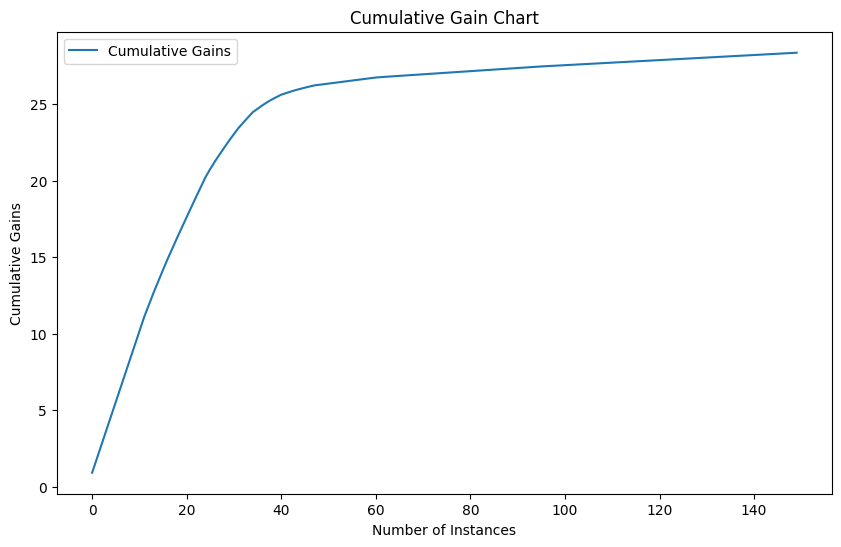

In [ ]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 6))
gain = np.cumsum(sorted(y_pred_proba[:, 1], reverse=True))
plt.plot(range(len(gain)), gain, label="Cumulative Gains")
plt.title("Cumulative Gain Chart")
plt.xlabel("Number of Instances")
plt.ylabel("Cumulative Gains")
plt.legend()
plt.show()


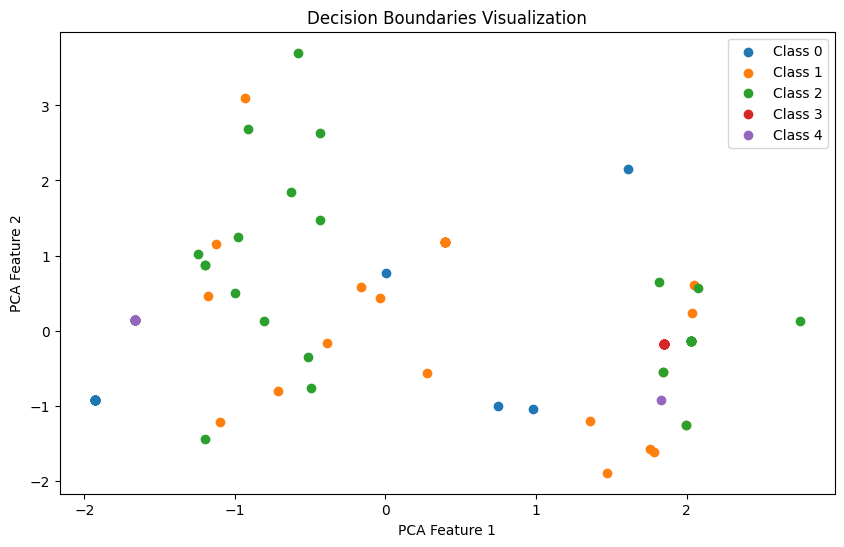

In [ ]:
from sklearn.decomposition import PCA

# PCA untuk mengurangi dimensi ke 2D
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
for i, class_label in enumerate(np.unique(y_test)):
    plt.scatter(X_test_pca[y_test == class_label, 0],
                X_test_pca[y_test == class_label, 1],
                label=f"Class {class_label}")

plt.title("Decision Boundaries Visualization")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.legend()
plt.show()


<ipython-input-96-6c342a3db7e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=test_data, x="True Label", y=feature, palette="coolwarm")


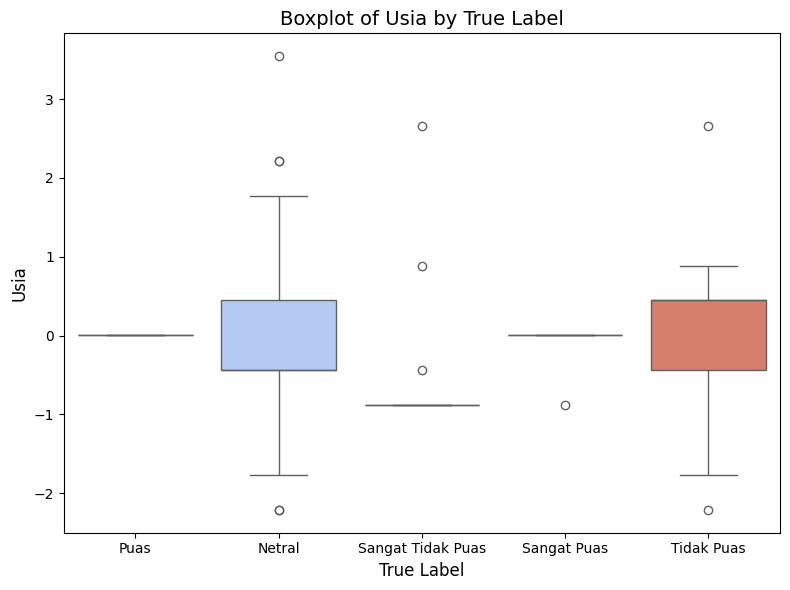

<ipython-input-96-6c342a3db7e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=test_data, x="True Label", y=feature, palette="coolwarm")


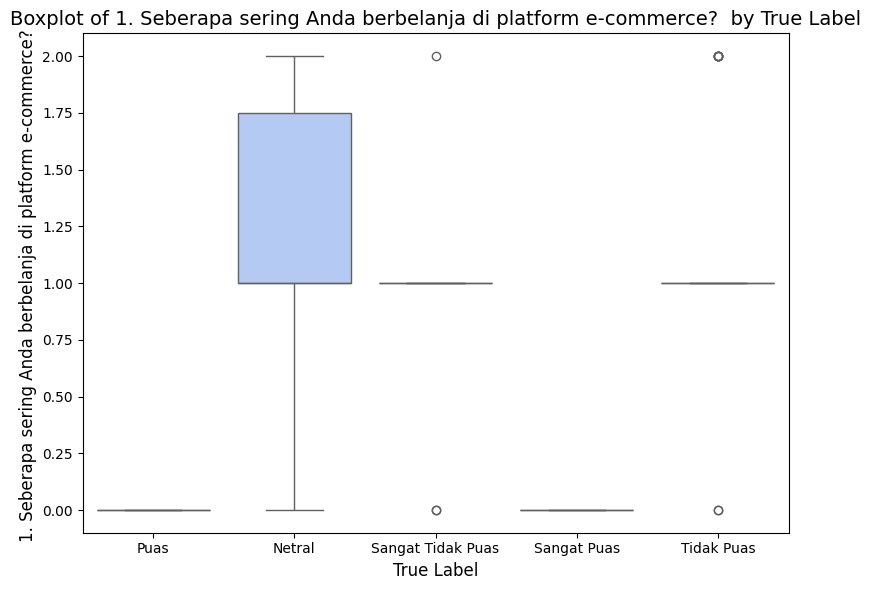

<ipython-input-96-6c342a3db7e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=test_data, x="True Label", y=feature, palette="coolwarm")


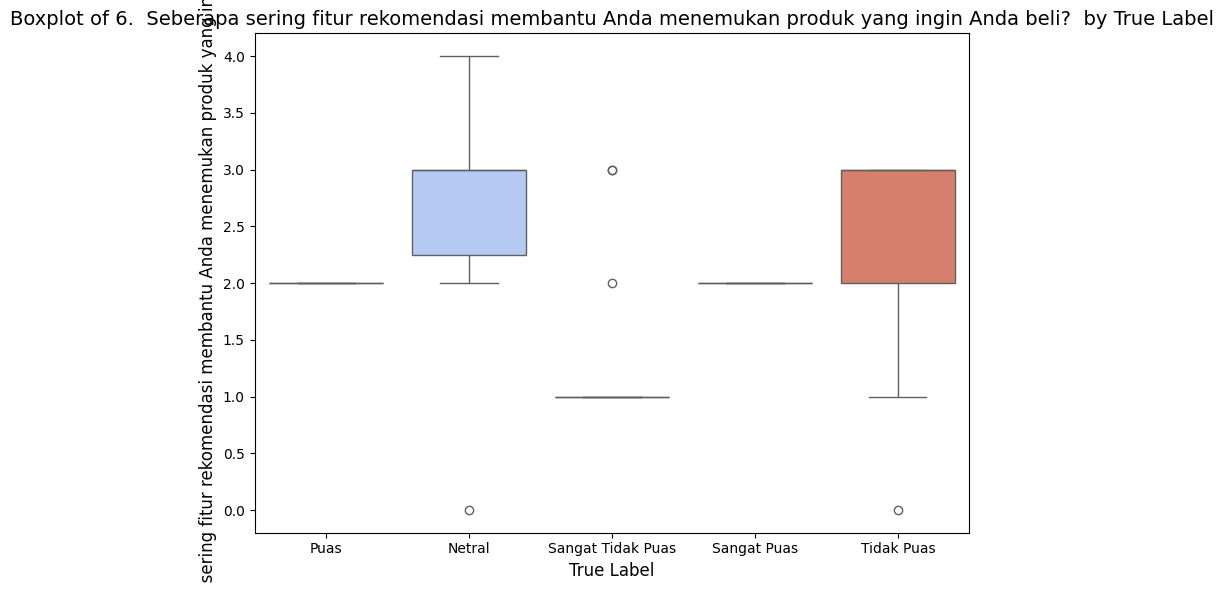

In [ ]:
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=test_data, x="True Label", y=feature, palette="coolwarm")
    plt.title(f"Boxplot of {feature} by True Label", fontsize=14)
    plt.xlabel("True Label", fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.tight_layout()
    plt.show()
